# 2110443 - Computer Vision (2018/1)
## Lab 2 - Basic Image Processing
In this lab, we will play with basic image pixel manipulation in grayscale images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

Import OpenCV, Numpy and Matplotlib as always

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import urllib.request
import json
%matplotlib inline

Use <a href="https://docs.opencv.org/3.4.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56">imread</a>  function to read image from file in <b>grayscale</b> format and display its dimension

In [25]:
inputImage = cv2.imread("assets/lena_std.tif",cv2.IMREAD_GRAYSCALE)
print('inputImage variable data type =>', type(inputImage))
print('inputImage variable numpy data type =>', inputImage.dtype)
print('inputImage dimensions', inputImage.shape)
print(inputImage)

inputImage variable data type => <class 'numpy.ndarray'>
inputImage variable numpy data type => uint8
inputImage dimensions (512, 512)
[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


We need to specify matplotlib imshow <a href="https://matplotlib.org/tutorials/colors/colormaps.html">colormap</a> (cmap) as gray to display grayscale images.

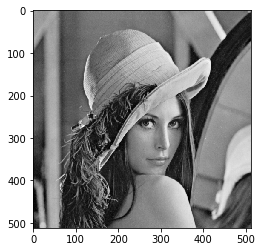

In [26]:
plt.imshow(inputImage, cmap='gray')
plt.show()

## Pixel Manipulation
You can use your old numpy knowledge here!

In [27]:
%%time
# Bad practice, you should not do this
inputImageTest = inputImage.copy()
for row in range(0,100):
    for col in range(0,inputImageTest.shape[1]):
        inputImageTest[row,col] = 255

CPU times: user 17 ms, sys: 713 µs, total: 17.7 ms
Wall time: 16.9 ms


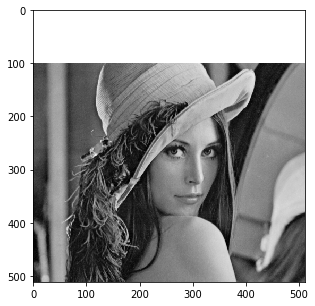

In [28]:
plt.figure(figsize=(5,5))
plt.imshow(inputImageTest, cmap='gray')
plt.show()

In [29]:
%%time
# Vectorization version is a lot faster
inputImageTest = inputImage.copy()
inputImageTest[0:100,:] = 255

CPU times: user 159 µs, sys: 53 µs, total: 212 µs
Wall time: 233 µs


## Assignment 1 - Pixel Manipulation
Use the provided mask to crop the famous "Lena Soderberg" face. 
Hint: - Only <b>Basic</b> numpy knowledge is required here! 

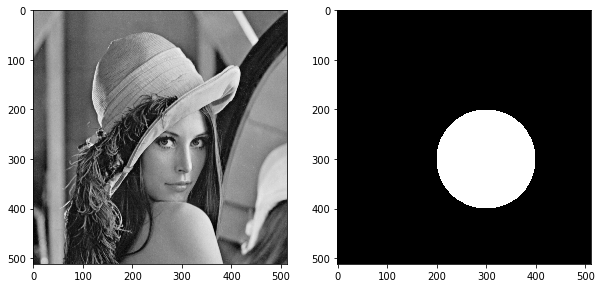

In [34]:
circleMask = np.zeros_like(inputImage)
cv2.circle(circleMask,(300,300), 100, (255),-1)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(inputImage, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(circleMask, cmap='gray')
plt.show()

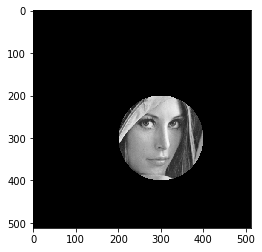

In [36]:
### FILL HERE ###
circleMask = circleMask / 255
plt.imshow(inputImage*circleMask, cmap='gray')
#################

## Basic Image Filtering
OpenCV already provided us with a wide range of filtering operation. The most common one is image blurring which is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image.

### 1. Averaging using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37">cv2.blur</a> function.
Simply takes the average of all the pixels in the kernel area

In [42]:
def cv2Blur(kernelSize):
    blurImage = cv2.blur(inputImage,(kernelSize,kernelSize))
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(cv2Blur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1));

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), Output()), _dom_cla…

### 2. Median Blur using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9">cv2.medianBlur</a>
Read the document and try to "mimic" the above interactive visualization!

In [46]:
### FILL HERE ###
def medianBlur(kernelSize):
    blurImage = cv2.medianBlur(inputImage,kernelSize)
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(medianBlur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1));
#################

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), Output()), _dom_cla…

### 3. Gaussian Blur using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1">cv2.GaussianBlur</a>
Gaussian blurring is highly effective in removing gaussian noise from the image.

In [38]:
def cv2GaussianBlur(kernelSize,sigmaX):
    gaussianBlurImage = cv2.GaussianBlur(inputImage,(kernelSize,kernelSize),sigmaX)
#     print(cv2.getGaussianKernel(kernelSize,sigmaX))
    plt.figure(figsize=(5,5))
    plt.imshow(gaussianBlurImage, cmap='gray')
    plt.show()
interact(cv2GaussianBlur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1),sigmaX=widgets.IntSlider(min=1,max=35,step=2,value=1));

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), IntSlider(value=1, …

### 4. Bilateral Filter ==> <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed">cv2.bilateralFilter</a>
Read the document and try to "mimic" the above interactive visualization! 

In [55]:
### FILL HERE ###
def BilateralBlur(diameter, sigmaColor, sigmaSpace):
    blurImage = cv2.bilateralFilter(inputImage, diameter, sigmaColor, sigmaSpace)
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
    
interact(BilateralBlur,
        diameter=widgets.IntSlider(min=1,max=100,step=2,value=1),
        sigmaColor=widgets.FloatSlider(min=1,max=300,step=2,value=1),
        sigmaSpace=widgets.FloatSlider(min=1,max=300,step=2,value=1));
#################

interactive(children=(IntSlider(value=1, description='diameter', min=1, step=2), FloatSlider(value=1.0, descri…

### 5. Custom Kernel Filtering ==> <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04">cv2.filter2D</a>

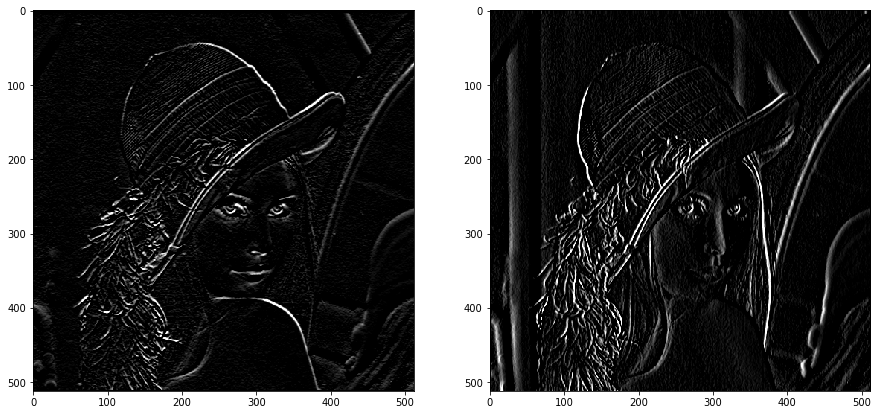

'\nWhat are these mysterious kernels do in your opinion?\n\n'

In [56]:
xKernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) # Mysterious Kernel?
yKernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filter2DOutput1 = cv2.filter2D(inputImage,-1,xKernel)
filter2DOutput2 = cv2.filter2D(inputImage,-1,yKernel)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(filter2DOutput1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(filter2DOutput2, cmap='gray')
plt.show()

'''
What are these mysterious kernels do in your opinion?
EDGE DETECTION
'''

## Assignment 2 - Which filter is the best?
The provided api are generated the random artificial noise into image. Your task is to implement the best way <b>(in your opinion)</b> to remove/eliminate those noise. Don't forget to state your reason in the following block. Answer can be in Thai or English.

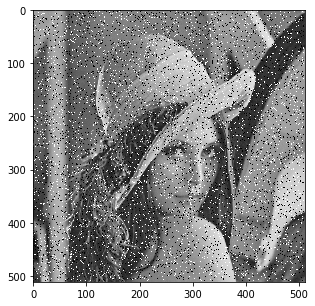

uint8


In [4]:
out1 = np.array(json.loads(urllib.request.urlopen('https://cgci.cp.eng.chula.ac.th/cv2018/lab2/noise1').read().decode('utf-8')),dtype=np.uint8)
# out1 = cv2.imread("assets/Lab2-noise1.jpg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(out1, cmap='gray')
plt.show()
print(out1.dtype)

In [6]:
### FILL HERE ###
def medianBlur(kernelSize):
    blurImage = cv2.medianBlur(out1,kernelSize)
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(medianBlur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1));
#################
'''
noise กระจายไปทั่วรูปภาพ ไม่กระจุกอยู่เป็นจุดๆ
การใช้ medianblur จะช่วยดึงเอาค่าที่มีอยู่มากใน kernel มาใช้
ทำให้ค่า noise หายไป เนื่องจากมีจำนวนน้อยกว่าสีจริง
'''

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), Output()), _dom_cla…

'\nnoise กระจายไปทั่วรูปภาพ ไม่กระจุกอยู่เป็นจุดๆ\nการใช้ medianblur จะช่วยดึงเอาค่าที่มีอยู่มากใน kernel มาใช้\nทำให้ค่า noise หายไป เนื่องจากมีจำนวนน้อยกว่าสีจริง\n'

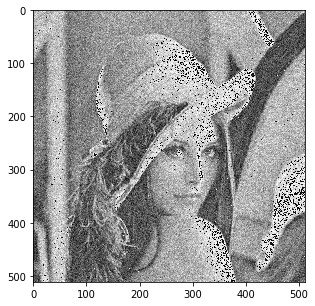

In [8]:
out2 = np.array(json.loads(urllib.request.urlopen('https://cgci.cp.eng.chula.ac.th/cv2018/lab2/noise2').read().decode('utf-8')),dtype=np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(out2, cmap='gray')
plt.show()

In [21]:
### FILL HERE ###
def cv2GaussianBlur(kernelSize, kernelSize2):
    BlurImage = cv2.medianBlur(out2,kernelSize)
    BlurImage = cv2.medianBlur(BlurImage,kernelSize)
    BlurImage = cv2.medianBlur(BlurImage,kernelSize2)
    BlurImage = cv2.medianBlur(BlurImage,kernelSize2)
    BlurImage = cv2.medianBlur(BlurImage,kernelSize2)   
    BlurImage = cv2.medianBlur(BlurImage,kernelSize2)
    
    plt.figure(figsize=(5,5))
    plt.imshow(BlurImage, cmap='gray')
    plt.show()

interact(cv2GaussianBlur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1),
        kernelSize2 = widgets.IntSlider(min=1,max=35,step=2,value=1));

'''
เนื่องจาก noise กรจุกตัวกันเป็นกลุ่ม ทำให้ median ใน kernel เป็น noise
แก้โดยการใช้ median blur หลายรอบๆ ในขนาดต่างๆกัน
medianblur ตอนแรก kernel กว้างเพื่อดึงสีอื่นที่ไม่ใช่ noise เข้ามาในกลุ่ม noise
medianblur ตอนหลัง kernel แคบเพื่อหยิบ noise ออก โดยที่ภาพในเบลอมากนัก
'''

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), IntSlider(value=1, …

'\nเนื่องจาก noise กรจุกตัวกันเป็นกลุ่ม ทำให้ median ใน kernel เป็น noise\nแก้โดยการใช้ median blur หลายรอบๆ ในขนาดต่างๆกัน\nmedianblur ตอนแรก kernel กว้างเพื่อดึงสีอื่นที่ไม่ใช่ noise เข้ามาในกลุ่ม noise\nmedianblur ตอนหลัง kernel แคบเพื่อหยิบ noise ออก โดยที่ภาพในเบลอมากนัก\n'

## Assignment 3 - Implementing your own filter2D function
![title](assets/Lab2-filter2D.png)

In this part, you will implement the image filter function by yourself. This function should have the function signature as shown below.
```python
def myFilter2D(inputImage, kernel, paddingMethod="constant", paddingValue=0):
    if paddingMethod == "constant":
        Myterious operations A
    elif paddingMethod == "replicate":
        Myterious operations B
    elif paddingMethod == "valid":
        Myterious operations C
    else
        print("Undefined padding method")
    return outputImage
```
You must implement 3 padding method
1. Constant ("constant")
2. Replicate border value ("replicate")
3. No Padding ("valid")

<b>Hint</b>: Numpy has a padding function! Use Google!!!

In [82]:
### FILL HERE ###
def myFilter2D(inputImage, kernel, paddingMethod="constant", paddingValue=0):
    if paddingMethod == "constant":
        paddedImage = np.pad(inputImage, 1, 'constant', constant_values=paddingValue)
    elif paddingMethod == "replicate":
        paddedImage = np.pad(inputImage, 1, 'edge')
    elif paddingMethod == "valid":
        paddedImage = inputImage
    else:
        print("Undefined padding method")
    
    n, m = paddedImage.shape
    kn, km = kernel.shape
    outputImage = np.empty((n-kn+1,m-km+1))
    for r in range(n-kn+1):
        for c in range(m-km+1):
            outputImage[r,c] = np.sum(paddedImage[r:r+kn,c:c+km])
    return outputImage

In [84]:
inputImage = np.array([[1,2,3],[4,5,6],[7,8,9]])
kernel = np.array([[1,1], [1,1], [1,1]])
myFilter2D(inputImage, kernel, paddingMethod="valid", paddingValue=0)

array([[27., 33.]])